## Data Collector for each agent

For agent-based models BPTK-Py has a standard data collector which collects the statistics (average, minumum, etc.) for all properties of all __agent types__. Collecting statistics for each agent individually will lead to a huge amount of data. However, if you want to explore this case or other cases which the standard data collector does not cover, you can also implement your own data collector. In this notebook, we explain how to proceed. Therefore we implement a new data collector class which collects the properties of each agent individually. 

We first create a new class and choose a name for it: `AgentDataCollector`. Then we implement the necessary methods and constructors. However, we don't want to create a whole new class but use the already existing methods of the standard data collector and extend it for our purposes. This saves a lot of work. The new data collector requires the following methods:

- A method which collects the data of each agent
- A method which represents the collected data in a dataframe (this is necessary for the plot method)
- A method which plots the data because the standard visualization class of BPTK-Py cannot handle the new data collector

_The data collector `AgentDataCollector` is already in the BPTK-Py framework but yet we will explain how to implement your own data collector._

## 1. Create data collector class

Create a class and name it `AgentDataCollector`.

## 2. Import libraries

As explained before, we want to derive the new data collector class from the standard class. Therefore we have to import the standard data collector.

```
from BPTK_Py.abm import DataCollector
```

For plotting the data, we also require pandas and a BPTK-Py config library. The config library is necessary to obtain the same plot design as the standard plot from BPTK-Py.

``` 
import pandas as pd
import BPTK_Py.config as config
``` 


Of course, you can add as many libraries as you want. In depends on what you need for your collector.

## 3. Derive standard class

This how you derive the standard data collector:

```
class AgentDataCollector(DataCollector)
```

## 4. Implement methods

As I explained before, we can either extend the class or replace methods. Since we want to overwrite the collecting method we have to replace `def collect_agent_statistic(self, time, agents)`. Now you can implement the logic of your own data collector. To save the statistics, you can use the attribute `self.agent_statistics` which is an empty dictionary.

After collecting all the data we have to bring them into an usable structure to be able to plot the statistics later. I chose to transform the dictionary into multiple dataframes. For each agent there exists one dataframe with its statistics. When we have the statistics in a dataframe we can exploit the functionalities of the library pandas.

The data is prepared and we can now plot them by using the visualization methods of pandas. To obtain the same design as the plot of BPTK-Py you need change the following parameters of the plot method. For the parameter `title` you can set any title name. For more information about the configuration you can go to the BPTK-Py documentation: [Developing Advanced User Interfaces](https://bptk.transentis-labs.com/en/latest/docs/general/how-to/how_to_developing_advanced_user_interfaces/how_to_developing_advanced_user_interfaces.html)

```
df.plot(kind=config.configuration["kind"],
                                  alpha=config.configuration["alpha"],
                                  stacked=config.configuration["stacked"],
                                  figsize=config.configuration["figsize"],
                                  title=title,
                                  color=config.configuration["colors"],
                                  lw=config.configuration["linewidth"])
```

## 5. Set our new data collector in simulation model

The previous steps explained how to implement a data collector. Now, we have to set the new data collector in our model class. To show you each step, we use our model SPMAgentDataCollector.py which is in `./simulation_models/spm`.

1. You go to the simulation model and open the Python file.
2. Import the new data collector: `from BPTK-Py.abm.datacollectors import AgentDataCollector`. 
3. Add `self.data_collector=AgentDataCollector()` in `instantiate_model(self)`.

## 6. Run simulation model with new data collector

In [1]:
# Start BPTK and automatically read the scenarios found in the scenarios folder
# this also loads all the Python classes referenced in the scenarios, so we are immediately ready 
# to run scenarios and plot results.

from BPTK_Py.bptk import bptk 

bptk = bptk()

In this step, we run the simulation model with a specific scenario. All statistics of each agent are collected by the data collector.

In [2]:
model = bptk.scenario_manager_factory.get_scenario("ABMsmSimpleProjectManagementAgentDataCollector","scenario80").model
model.run()

Now you can plot the stats of one or more specific agents. In our case we want to compare two tasks and see how much effort remains for them.

The following bullet points describe the parameters of the plot method:
- agent_ids: choose the stats of the agents you want plot
- properties: choose properties you want to plot
- title: choose title of the plot
- agent_type: choose the agent type

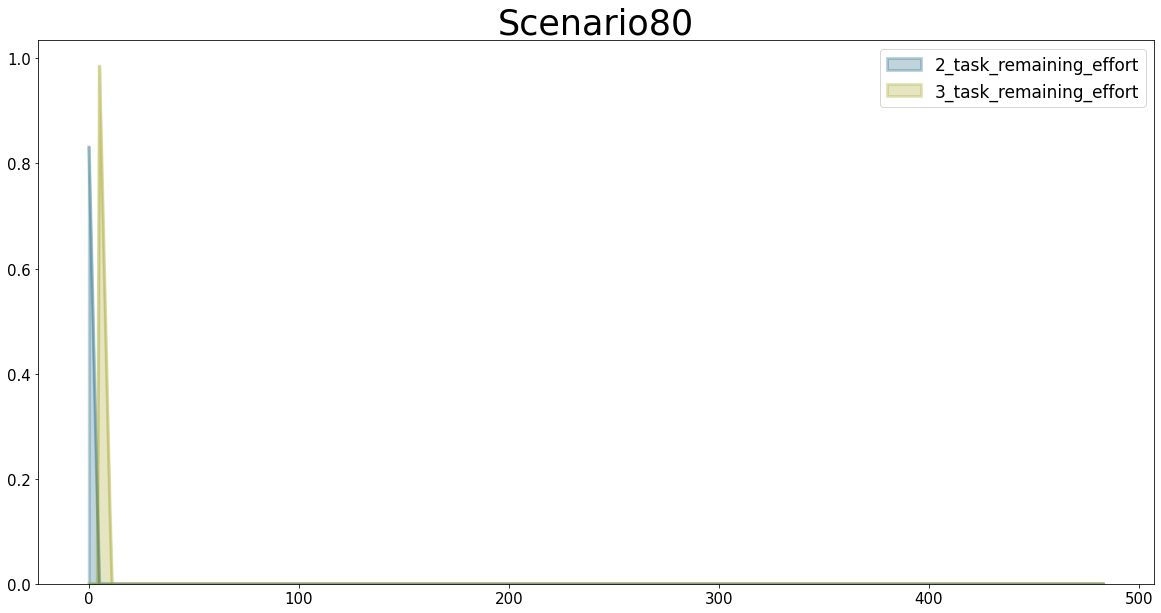

In [3]:
ax = model.data_collector.plot_agent_stats(agent_ids=[2,3],properties=['remaining_effort'],title="Scenario80",agent_type="task")

Output the stats in a dataframe

In [4]:
model.data_collector.get_agent_stats()['task'][2]

,id,time,agent_state,agent_type,effort,remaining_effort
0,2,0.00,in_progress,task,1,0.831200
1,2,0.25,in_progress,task,1,0.662273
2,2,0.50,in_progress,task,1,0.493219
3,2,0.75,in_progress,task,1,0.324038
4,2,1.00,in_progress,task,1,0.154729
...,...,...,...,...,...,...
479,2,119.75,closed,task,1,0.000000
480,2,120.00,closed,task,1,0.000000
481,2,120.25,closed,task,1,0.000000
482,2,120.50,closed,task,1,0.000000


In [5]:
model.data_collector.get_agent_stats()['task'][3]

,id,time,agent_state,agent_type,effort,remaining_effort
0,3,0.00,open,task,1,0.0
1,3,0.25,open,task,1,0.0
2,3,0.50,open,task,1,0.0
3,3,0.75,open,task,1,0.0
4,3,1.00,open,task,1,0.0
...,...,...,...,...,...,...
479,3,119.75,closed,task,1,0.0
480,3,120.00,closed,task,1,0.0
481,3,120.25,closed,task,1,0.0
482,3,120.50,closed,task,1,0.0


If you want to get all stats of each agent you call `model.data_collector.get_agent_stats()`

In [6]:
model.data_collector.get_agent_stats()

{'staf_member': {0:      id    time agent_state   agent_type
  0     0    0.00        busy  staf_member
  1     0    0.25        busy  staf_member
  2     0    0.50        busy  staf_member
  3     0    0.75        busy  staf_member
  4     0    1.00        busy  staf_member
  ..   ..     ...         ...          ...
  479   0  119.75   available  staf_member
  480   0  120.00   available  staf_member
  481   0  120.25   available  staf_member
  482   0  120.50   available  staf_member
  483   0  120.75   available  staf_member
  
  [484 rows x 4 columns]},
 'controlling': {1:      id    time agent_state   agent_type  productivity  schedule_pressure
  0     1    0.00      active  controlling      0.675200           0.800000
  1     1    0.25      active  controlling      0.675708           0.800313
  2     1    0.50      active  controlling      0.676216           0.800626
  3     1    0.75      active  controlling      0.676725           0.800939
  4     1    1.00      active  control